In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [3]:
df = df.set_axis(['X','Y','CLASS'],axis=1)
df.head()

,X,Y,CLASS
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


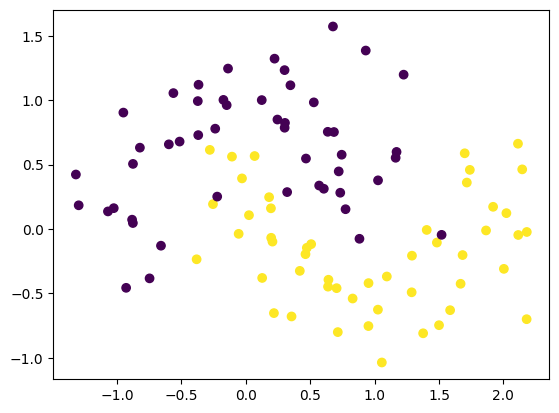

In [4]:
plt.scatter(df['X'],df['Y'],c=df['CLASS'])
plt.show()

In [8]:
X= df.iloc[:,0:2].values
y = df.iloc[:,-1].values



In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# XAVIER INITIALIZATION ONLY WORKS FOR "tanh" . IN XAVIER INITIALIZATION WE MULTIPLY OUR INPUT BY 1/n . where n is the number of nodes connecting to other node  

In [31]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_shape=(2,),kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
initial_weights = model.get_weights()

In [34]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(X,y,epochs = 100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3554 - loss: 0.7301 - val_accuracy: 0.3500 - val_loss: 0.7273
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4475 - loss: 0.7168 - val_accuracy: 0.4000 - val_loss: 0.7068
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5558 - loss: 0.6989 - val_accuracy: 0.6000 - val_loss: 0.6871
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6022 - loss: 0.6845 - val_accuracy: 0.8500 - val_loss: 0.6680
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6489 - loss: 0.6726 - val_accuracy: 0.9000 - val_loss: 0.6491
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8197 - loss: 0.6538 - val_accuracy: 0.9000 - val_loss: 0.6312
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7884 - loss: 0.6425 - val_accuracy: 0.9000 - val_loss: 0.6141
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8065 - loss: 0.6285 - val_accuracy: 0.8500 - val_loss:

In [37]:
model.get_weights()

[array([[-0.0457204 , -0.30617914, -0.02303955,  0.26692376, -0.1925507 ,
          0.43551293,  0.56810135,  0.0743432 , -0.2134651 ,  0.12505949],
        [-0.34615132,  0.47103858, -0.39343086,  0.12889582,  0.40331343,
         -0.00433864, -0.27697042, -0.11902931, -0.07404783, -0.42635745]],
       dtype=float32),
 array([ 0.0790166 ,  0.04796956,  0.04932977, -0.06803036, -0.0129205 ,
         0.0009466 , -0.03466074, -0.02189466,  0.01541246,  0.00694991],
       dtype=float32),
 array([[ 0.12958883,  0.14100991, -0.11600874, -0.19065893,  0.46951643,
          0.13633262,  0.06336247, -0.1038212 , -0.54705644, -0.09913058],
        [ 0.48818323,  0.37784493,  0.09830257, -0.3539508 ,  0.10714971,
          0.46444538, -0.63494366,  0.33086565, -0.26015684,  0.24840811],
        [-0.44691733, -0.19147743, -0.21985112,  0.2958245 , -0.09475963,
          0.21928   , -0.20227721,  0.27152905, -0.05805608, -0.65008295],
        [ 0.00247495,  0.44064188, -0.3365936 , -0.02824539, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 733us/step


<Axes: >

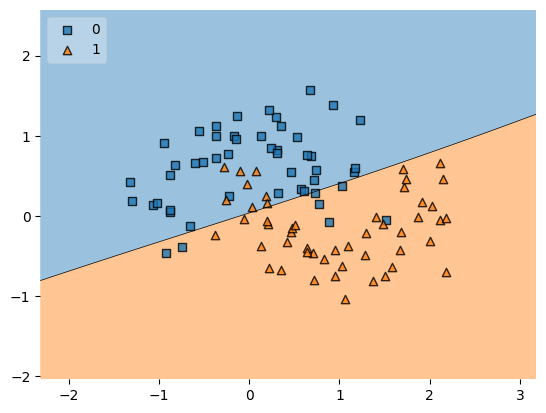

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# HE-INITIALIIZATION - IT IS USED WITH RELU ACTIVATION . THE CHANGE IS FORMULA IS WE USE Sqrt(2/fan_in)
 # WHERE fan_in refers to the number of inputs a node is recieving